<div style="text-align: center;">
    <img src="https://media.gq.com/photos/59f0aa1cf964810d9a9b8f23/4:3/w_1024%2Cc_limit/1025-KickStarterMenswear_16x9.gif" width="500"/>
</div>


<link href="https://fonts.googleapis.com/css2?family=Poppins:wght@700&display=swap" rel="stylesheet">
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@400;500&display=swap" rel="stylesheet">

<div style="text-align: center; 
            background: #02af77;
            padding: 20px; 
            border-radius: 12px;
            box-shadow: 0 4px 12px rgba(0,0,0,0.1);
            margin-bottom: 30px;
            border: 2px solid #27AE60;">
    <h1 style="color: black; 
               font-family: 'Poppins', sans-serif; 
               font-weight: 800;
               font-size: 2.5rem;
               margin: 0;
               text-shadow: 1px 1px 3px rgba(0,0,0,0.1);
               letter-spacing: -0.5px;">
        ✨🤖 Kickstarter : Predicting Funding Amount Using Machine Learning 🤖✨
    </h1>
    <p style="font-family: 'Roboto', sans-serif;
              color: #333;
              margin-top: 10px;
              font-weight: 500;
              font-size: 1.1rem;">
        Predict how much funding you will receive before launching your Kickstarter project!
    </p>
</div>

<div class="section">
    <h2 class="section-title">How Does Kickstarter Work?</h2>
    <ol style="font-family: 'Open Sans', sans-serif; font-size: 1.1rem; line-height: 1.6; padding-left: 25px;">
        <li><strong>Project Creation:</strong> A creator sets a funding goal and deadline (Duration).</li>
        <li><strong>Pledges:</strong> Backers pledge money to support the project.</li>
        <li><strong>Fail or Success:</strong> If the goal isn’t met by the deadline, no money is collected.</li>
    </ol>
    <p style="font-family: 'Open Sans', sans-serif; font-size: 1.1rem; margin-top: 10px;">
        Since 2009, Kickstarter has funded <span class="highlight">200,000+ projects</span>, raising over <span class="highlight">$5 billion</span>!
    </p>
</div>

<div class="section">
    <h2 class="section-title">Accountability</h2>
    <ul style="font-family: 'Open Sans', sans-serif; font-size: 1.1rem; line-height: 1.6; padding-left: 25px;">
        <li>Supports <span class="highlight">15 categories</span> (e.g., music, tech, food, design).</li>
        <li>Creators must be transparent: sharing updates, challenges, and engaging backers.</li>
    </ul>
</div>

<center><h1 style="font-family: 'Roboto', sans-serif; font-weight: 600;">1- Exploratory Data Analysis (EDA)</h1></center>

In [285]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [286]:
data_df=pd.read_csv('DAI_kickstarterscrape_dataset.csv', encoding = 'latin1')

In [287]:
plt.rcParams.update({
    'font.family': 'Palatino Linotype',
    'axes.labelsize': 20,
    'axes.titlesize': 25,
    'xtick.labelsize': 19,
    'ytick.labelsize': 19,
    'legend.fontsize': 16,
    'figure.figsize': (8, 8),
    'lines.linewidth': 5,
    'grid.alpha': 0.5,
    
    # Bold title & spacing
    'axes.titleweight': 'bold', 
    'axes.titlepad': 10,         # for spacing between title and the plot
})

In [288]:
data_df.head(5)

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


| Column Name         | Description |
|---------------------|-------------|
| project id         | A unique identifier for the Kickstarter project. |
| name              | The title of the Kickstarter project. |
| url               | The link to the project's Kickstarter page. |
| category          | The main category under which the project falls (e.g., Film & Video, Technology, Music, etc.). |
| subcategory       | The specific subcategory within the main category (e.g., Short Film, Documentary, Tabletop Games). |
| location         | The city and state where the project is based. |
| status           | The current state of the project (e.g., successful, failed, live, canceled). |
| goal             | The fundraising goal set by the creator in USD. |
| pledged          | The total amount of money pledged by backers in USD. |
| funded percentage | The percentage of the goal that was achieved (pledged amount ÷ goal). |
| backers          | The number of people who pledged money to support the project. |
| funded date      | The date and time when the project was successfully funded. |
| levels           | The number of reward levels offered to backers. |
| reward levels    | The specific pledge amounts required to receive rewards (e.g., $25, $50, $100, etc.). |
| updates          | The number of updates posted by the project creator to inform backers of progress. |
| comments         | The number of comments made by backers or supporters on the project page. |
| duration         | The total length of the Kickstarter campaign in days. |



In [290]:
data_df.shape

(45957, 17)

In [291]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">1.1- Data Cleaning</h2></center>

In [293]:
data_df = data_df.drop_duplicates()

In [294]:
data_df.duplicated().sum()  # should be zeros now!

0

### Do we need all the columns?
- ID, url and Name columns are unique identifier and are not used in the ml, drop them.

In [296]:
data_df = data_df.drop(['url', 'name'], axis=1)

In [297]:
data_df.head()

,project id,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [298]:
data_df['location'].unique()

array(['Columbia, MO', 'Maplewood, NJ', 'Los Angeles, CA', ...,
       'Osage, IA', 'Lake Oswego, OR', 'Celebration, FL'], dtype=object)

#### The problem with this column is with the data entering, having a state code and the city seperated would be more useful

In [300]:
# split the location column into state and location
data_df[['state', 'city']] = data_df['location'].str.split(',', n=1, expand=True)

In [301]:
# Resolving Encoding Issues in Text Data
data_df["category"] = data_df["category"].replace("Film &amp; Video", "Film & Video")

In [302]:
#Convert (goal, pledged, and backers) columns to numeric
data_df['goal'] = pd.to_numeric(data_df['goal'], errors='coerce')
data_df['pledged'] = pd.to_numeric(data_df['pledged'], errors='coerce')
data_df['backers'] = pd.to_numeric(data_df['backers'], errors='coerce')

In [303]:
#Check the previous steps
data_df.dtypes

project id             int64
category              object
subcategory           object
location              object
status                object
goal                 float64
pledged              float64
funded percentage    float64
backers                int64
funded date           object
levels                 int64
reward levels         object
updates                int64
comments               int64
duration             float64
state                 object
city                  object
dtype: object

In [304]:
print('Number of null') 
print(data_df.isnull().sum())
print('-'*100)
print('Rate of null in each column')
print(data_df.isnull().sum() / len(data_df) * 100)

Number of null
project id              0
category                0
subcategory             0
location             1321
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
state                1321
city                 1322
dtype: int64
----------------------------------------------------------------------------------------------------
Rate of null in each column
project id           0.000000
category             0.000000
subcategory          0.000000
location             2.880003
status               0.000000
goal                 0.000000
pledged              0.026162
funded percentage    0.000000
backers              0.000000
funded date          0.000000
levels               0.000000
reward levels        0.128630
updates              0.000000
comments   

In [305]:
print('Number of null') 
print(data_df.isnull().sum())
print('-'*100)
print('Rate of null in each column')
print(data_df.isnull().sum() / len(data_df) * 100)

Number of null
project id              0
category                0
subcategory             0
location             1321
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
state                1321
city                 1322
dtype: int64
----------------------------------------------------------------------------------------------------
Rate of null in each column
project id           0.000000
category             0.000000
subcategory          0.000000
location             2.880003
status               0.000000
goal                 0.000000
pledged              0.026162
funded percentage    0.000000
backers              0.000000
funded date          0.000000
levels               0.000000
reward levels        0.128630
updates              0.000000
comments   

In [306]:
data_df=data_df.dropna()
# Just get rid of the nulls
print('Number of null')
print(data_df.isnull().sum())
print('-'*50)
print('Null percentage')
print(data_df.isnull().sum() / len(data_df) * 100)

Number of null
project id           0
category             0
subcategory          0
location             0
status               0
goal                 0
pledged              0
funded percentage    0
backers              0
funded date          0
levels               0
reward levels        0
updates              0
comments             0
duration             0
state                0
city                 0
dtype: int64
--------------------------------------------------
Null percentage
project id           0.0
category             0.0
subcategory          0.0
location             0.0
status               0.0
goal                 0.0
pledged              0.0
funded percentage    0.0
backers              0.0
funded date          0.0
levels               0.0
reward levels        0.0
updates              0.0
comments             0.0
duration             0.0
state                0.0
city                 0.0
dtype: float64


<h4 style="text-align: center; font-family: 'Roboto', sans-serif; color: #333;">
    The percentage of missing data is  
    <span style="color: red; font-size: 20px; font-weight: bold;">only 2.88% or less.</span>
</h4>
<h4 style="text-align: center; color: red; font-family: 'Roboto', sans-serif; font-weight: bold;">
    Dropping all null values will not compromise the integrity of our dataset.
</h4>


<div style="text-align: center;">
    <img src="https://media.tenor.com/2rAuZWSTScQAAAAM/neat-camera.gif" alt="Neat Camera GIF">
</di>

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">1.2- Data Visualizing</h2></center>

Text(0, 0.5, 'Projects')

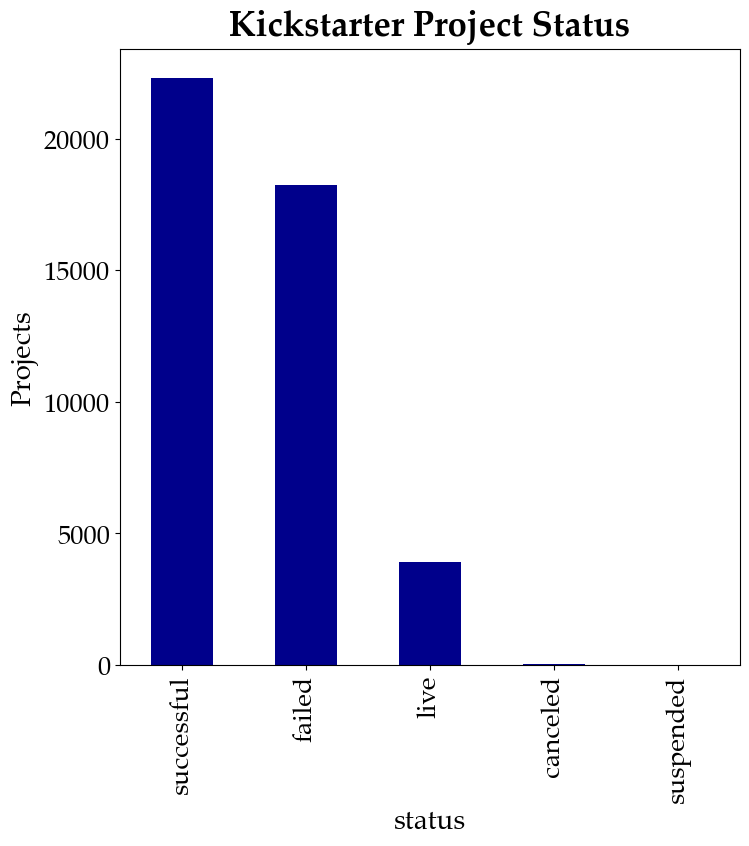

In [310]:
#Distribution of project status
data_df['status'].value_counts().plot(kind='bar', color='darkblue')
plt.title('Kickstarter Project Status')
plt.ylabel('Projects')

#### In this dataset, the plurality of projects  are successful, a significant amount of projects were failed, and the remaining numbers are live.

Text(0, 0.5, 'Number of the projects')

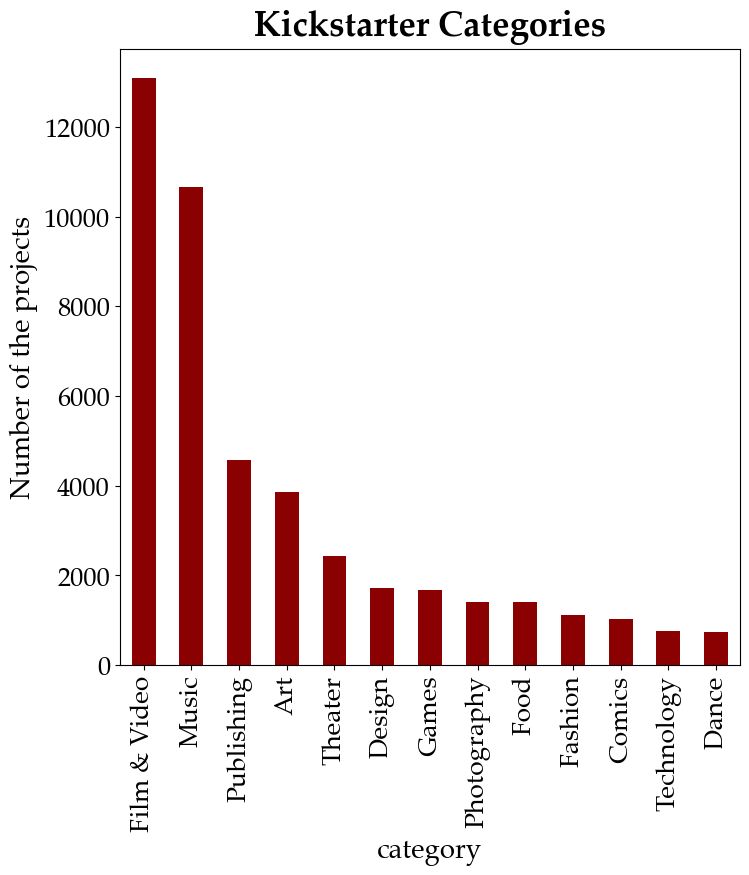

In [312]:
#Distribution of main categories
data_df['category'].value_counts().plot(kind='bar', color='darkred')
plt.title('Kickstarter Categories')
plt.ylabel('Number of the projects')

#### Film & Video, Music, and Publishing are the categories that attract the most attention. These creative projects mainly rely on innovation and originality.

#### How can we sense the success of a project? a measure?

In [315]:
#Lets see the distribution of goals
data_df['goal'].describe()

count    4.449100e+04
mean     1.210014e+04
std      1.918070e+05
min      5.000000e-01
25%      1.800000e+03
50%      4.000000e+03
75%      1.000000e+04
max      2.147484e+07
Name: goal, dtype: float64

#### The Kickstarter project goal distribution is highly right-skewed, with a wide range of values and significant variability, indicated by a large standard deviation; So, the median is more representative due to the presence of extreme outliers.

In [317]:
data_df['pledged'].describe()

count    4.449100e+04
mean     5.056863e+03
std      5.765394e+04
min      0.000000e+00
25%      2.000000e+02
50%      1.325000e+03
75%      4.200000e+03
max      1.026684e+07
Name: pledged, dtype: float64

#### It would be more representable to just calculate the success ratio of each project by:
ratio=pledged/goal.
- **Note: This measure is equal to the funded percentage column. However, there is an issue with some values in this column, so the measure was recalculated to avoid such discrepancies.**

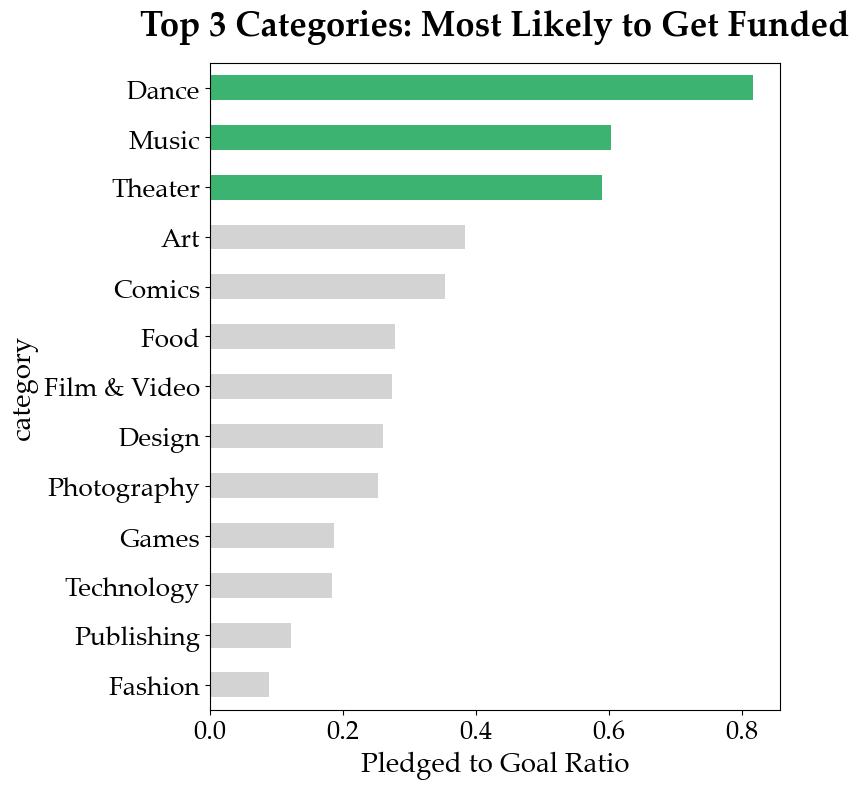

In [319]:
# Calculate median pledged/goal ratio
category_ratio = data_df.groupby('category').agg({'pledged': 'median', 'goal': 'median'})
category_ratio['ratio'] = category_ratio['pledged'] / category_ratio['goal']

# Sort values and separate top 3
sorted_ratio = category_ratio['ratio'].sort_values(ascending=True)
top_3 = sorted_ratio.index.isin(sorted_ratio.nlargest(3).index)  

# Assign colors: green for top 3, gray for others
colors = ['mediumseagreen' if top else 'lightgray' for top in top_3]

sorted_ratio.plot(kind='barh', color=colors)  # Color bars conditionally
plt.title('Top 3 Categories: Most Likely to Get Funded', weight='bold', pad=20)
plt.xlabel('Pledged to Goal Ratio')

plt.tight_layout()

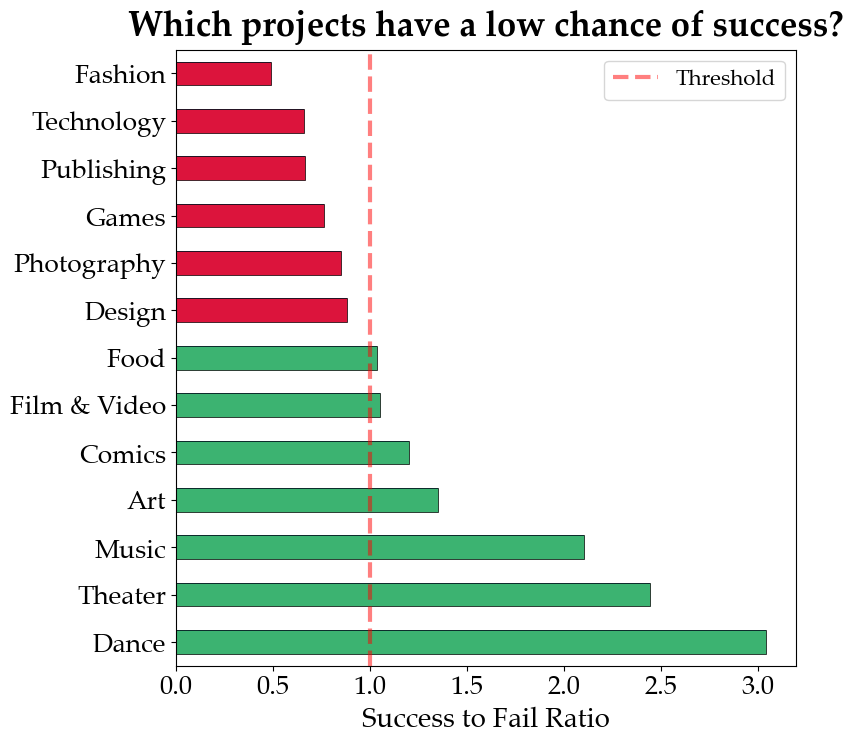

In [320]:
category_status =data_df.pivot_table(index='category', columns='status', values='project id',aggfunc='count')
category_status['WLratio'] = category_status['successful'] / category_status['failed']
category_status['WLratio'].sort_values(ascending=False).plot(kind='barh')
# Sort values and identify categories below threshold (WLratio < 1)
sorted_ratio = category_status['WLratio'].sort_values(ascending=False)
below_threshold = sorted_ratio < 1  # Boolean mask for categories below threshold

# Assign colors: crimson for below-threshold, darkgreen otherwise
colors = ['crimson' if below else 'mediumseagreen' for below in below_threshold]

# Plot
ax = sorted_ratio.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5)
plt.title('Which projects have a low chance of success?')
plt.xlabel('Success to Fail Ratio')
plt.ylabel('')
line=plt.axvline(x=1, color='red', ls='--', lw=3,alpha=0.5, label='Threshold')
plt.legend(handles=[line])  

Text(0, 0.5, '')

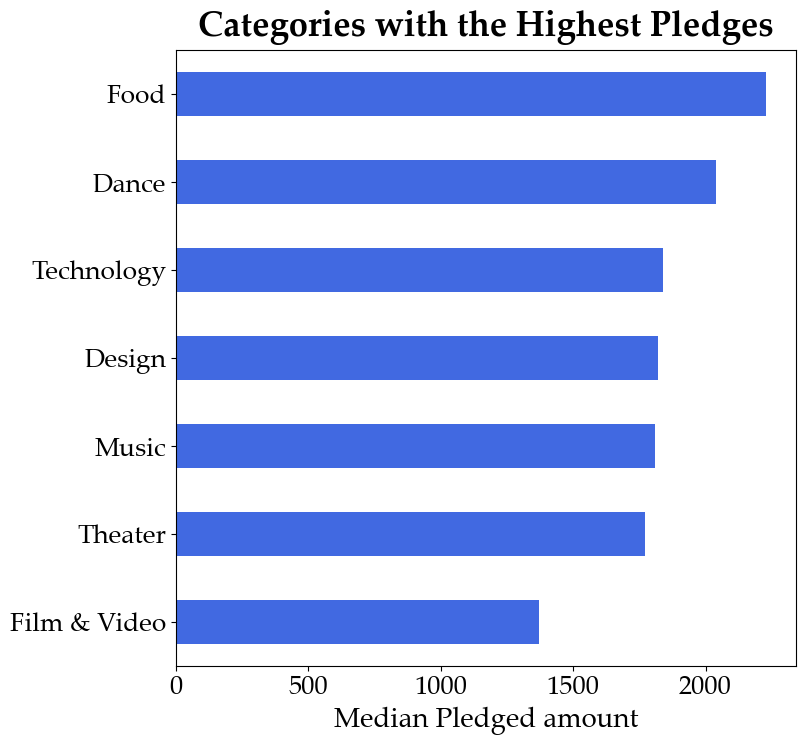

In [321]:
category_median_pledge = data_df.groupby('category')['pledged'].median().nlargest(7).sort_values(ascending=True).plot(kind='barh', color='royalblue')
plt.title('Categories with the Highest Pledges')
plt.xlabel('Median Pledged amount')
plt.ylabel('')

Text(0, 0.5, '')

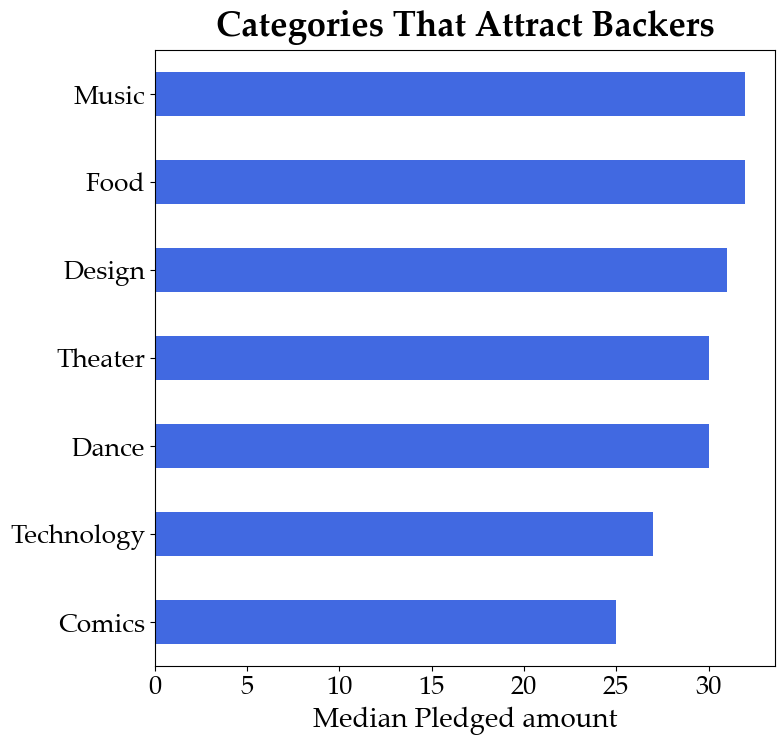

In [322]:
category_median_pledge = data_df.groupby('category')['backers'].median().nlargest(7).sort_values(ascending=True).plot(kind='barh', color='royalblue')
plt.title('Categories That Attract Backers')
plt.xlabel('Median Pledged amount')
plt.ylabel('')

Text(0, 0.5, '')

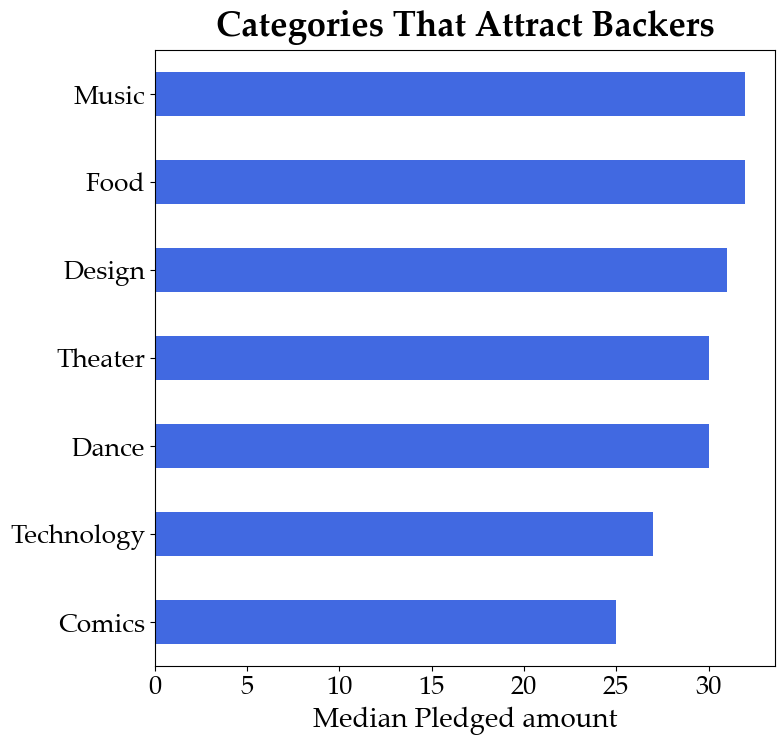

In [323]:
category_median_pledge = data_df.groupby('category')['backers'].median().nlargest(7).sort_values(ascending=True).plot(kind='barh', color='royalblue')
plt.title('Categories That Attract Backers')
plt.xlabel('Median Pledged amount')
plt.ylabel('') 

NameError: name 'data' is not defined

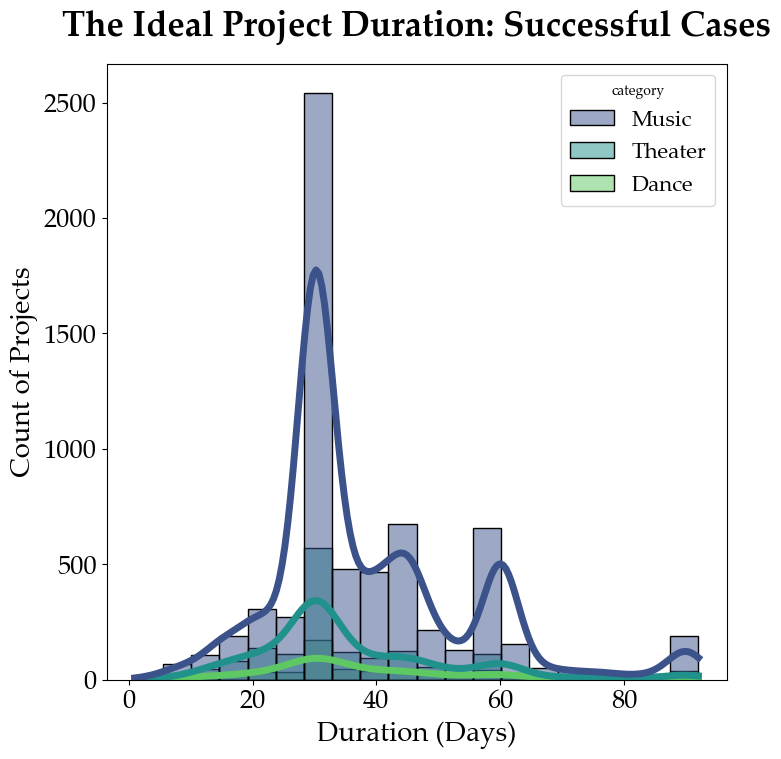

In [324]:
successful_df = data_df[
    (data_df['status'] == 'successful') & 
    (data_df['category'].isin(['Dance', 'Music', 'Theater']))
]
sns.histplot(
    data=successful_df,
    x='duration',
    hue='category',
    bins=20,
    kde=True,
    palette='viridis'
)

plt.title('The Ideal Project Duration: Successful Cases', pad=20)
plt.xlabel('Duration (Days)')
plt.ylabel('Count of Projects')
plt.legend(data)
plt.show()

In [325]:
best_locations = (
    successful_df.groupby('category')['location']
    .value_counts()          
    .groupby('category')    
    .idxmax()  # To get the (category,location) with max count
    .reset_index(name='location')
)
print(best_locations)

  category                 location
0    Dance    (Dance, New York, NY)
1    Music    (Music, New York, NY)
2  Theater  (Theater, New York, NY)


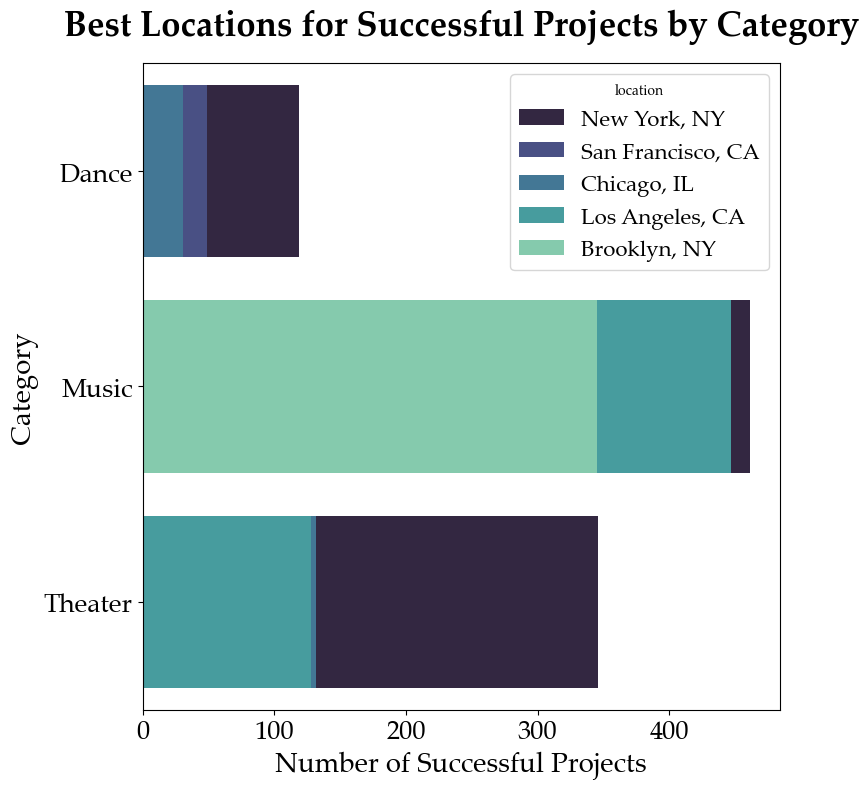

In [327]:
best_locations = (
    successful_df.groupby('category')['location']
    .value_counts()
        .groupby('category')
    .head(3)
    .reset_index(name='project_count')
)
sns.barplot(
    data=best_locations,
    x='project_count',
    y='category',
    hue='location',
    palette='mako',
    dodge=False
)

plt.title('Best Locations for Successful Projects by Category', pad=20)
plt.xlabel('Number of Successful Projects')
plt.ylabel('Category')
plt.legend(bbox_to_anchor=(1, 1), title='location')
plt.tight_layout()
plt.show()

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">1.3- Recommendation </h2></center>

- Projects with a higher success rate (better chance of getting funded within the timeframe) include the following:  
  1. `Dance`
  2. `Music` 
  3. `Theater`
     
On a median basis, these projects receive a substantial amount of funding and attract a significant number of backers. *Therefore, launching a project in any of these categories on Kickstarter is highly recommended.*

##### **Key Insights for Successful Projects**  

##### **1. Optimal Duration: 30 Days**  
- The **median duration** of successful projects in these categories (**Dance, Music, Theater**) is **30 days**.  
- Projects that run for **approximately one month** maintain the best balance between urgency and backer engagement.  
- *Avoid longer campaigns*: Few successful projects exceed **60 days**.  

##### **2. Top Location: New York, USA**  
📍 **Why New York?**  
- **Highest success rate**: New York City leads in funded projects across these categories.  
- **Music hotspot**: Brooklyn alone has hosted **over 350 successful music projects**, making it an ideal launchpad for musicians.  

<center><h1 style="font-family: 'Roboto', sans-serif; font-weight: 600;">2- Machine learning </h1></center>

In [329]:
# Add new columns
#note: this is similar to funded percentage but the original columns has many issues with the values, so we will replace it with this column measure
data_df['pledge_to_goal_ratio'] = data_df['pledged'] / data_df['goal']
# Handle division by zero (if 'goal' can be 0)
data_df['pledge_to_goal_ratio'] = data_df.apply(
    lambda row: row['pledged'] / row['goal'] if row['goal'] != 0 else float('inf'), 
    axis=1)
    
data_df['updates_per_day'] = data_df['updates'] / data_df['duration']

In [331]:
data_df = data_df.drop(['project id', 'funded percentage'], axis=1)

In [333]:
ml_df=data_df
ml_df = ml_df.drop(["funded date", "reward levels","status","levels","state","city"], axis = 1)

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">2.2- Features selection</h2></center>

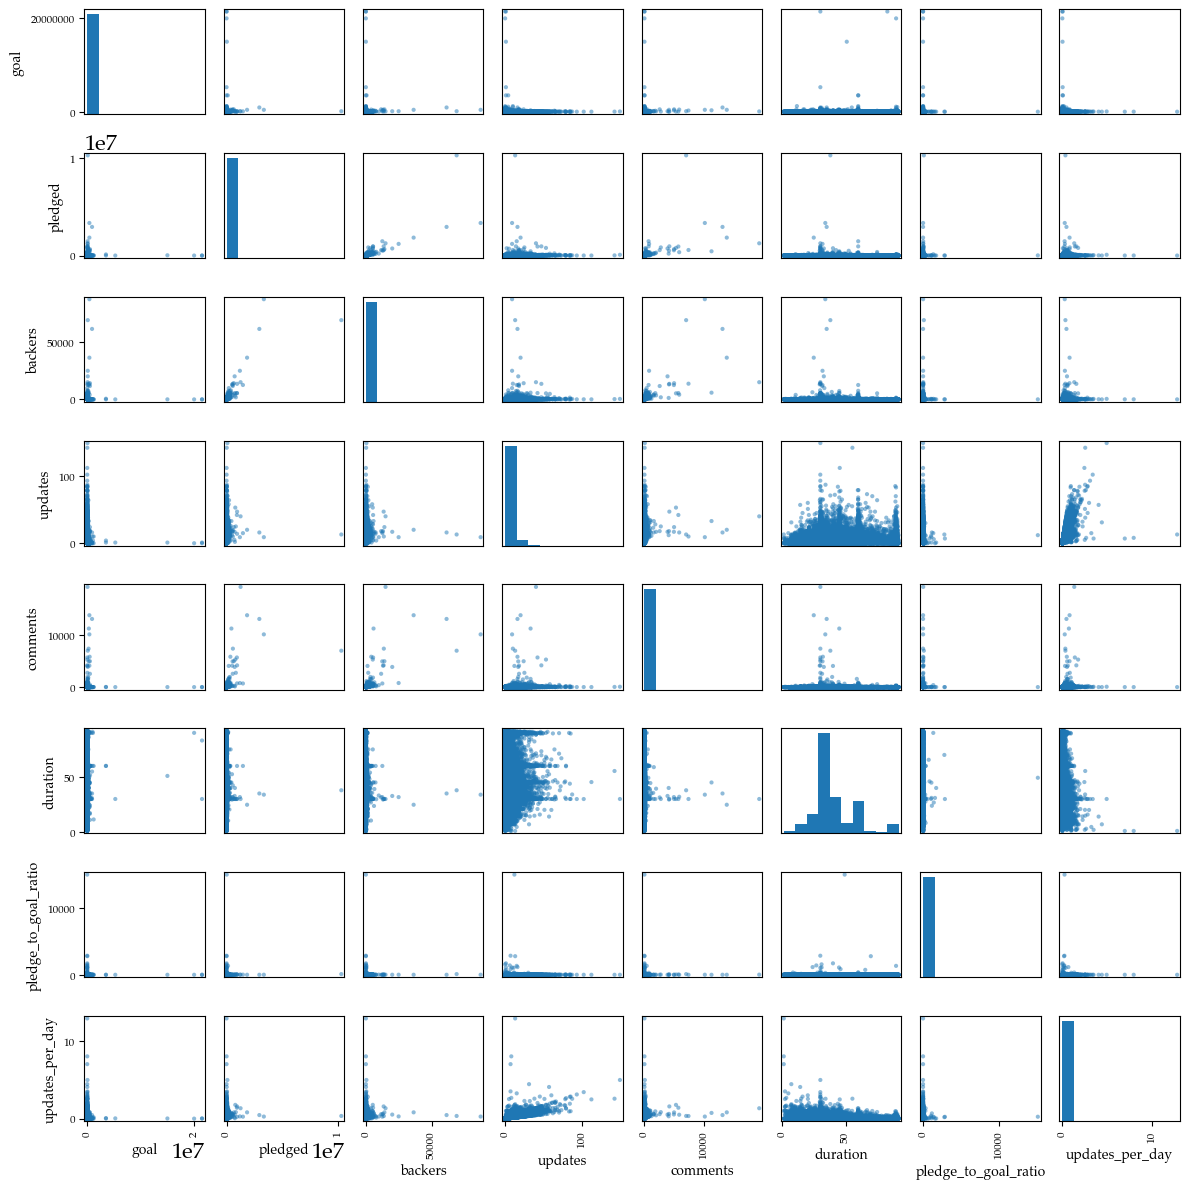

In [335]:
from pandas.plotting import scatter_matrix
#Setting the defult style of the plots:

plt.rcParams.update({
    'font.family': 'Palatino Linotype',
    'axes.labelsize': 10,      # Font size of axis labels
    'xtick.labelsize': 16,     # Font size of x-axis ticks
    'ytick.labelsize': 16,     # Font size of y-axis ticks
})
scatter_matrix(ml_df, figsize=(12, 12));
plt.tight_layout()

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">2.3- Creating a pipline</h2></center>

In [337]:
from sklearn.pipeline import Pipeline # To create pipelines for each type of data
from sklearn.compose import ColumnTransformer # To create the full pipeline
from sklearn.preprocessing import StandardScaler # To normalize the data
from sklearn.impute import SimpleImputer # To deal with Nulls in the numeric data
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # to encode the categorical data
from sklearn.model_selection import train_test_split # splits the data

# Define features and target
features = ['subcategory', 'location', 'goal', 'backers', 'updates_per_day']   
target = "pledged"

X = ml_df[features]
y = ml_df[target]

# Split data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
num_attribs = ['goal', 'backers', 'updates_per_day']
cat_attribs = ['subcategory', 'location']

# Create preprocessing pipelines
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),  # Drops unknown categories
])

In [338]:
# Apply preprocessing to train and test sets
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [339]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_prepared, y_train)

RandomForestRegressor(random_state=42)

In [340]:
# Evaluate
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_prepared)
print("R2:", r2_score(y_test, y_pred))

R2: 0.7644802332347408


#### our model has ~76.45% of the variance in the target variable (Pledge amount)

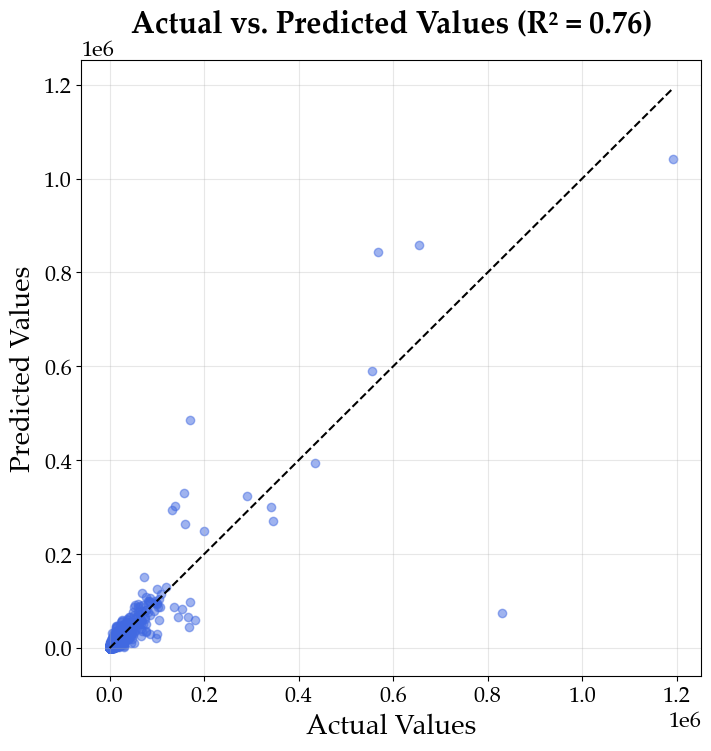

In [374]:
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1.5)  # Perfect fit line
plt.xlabel('Actual Values', fontsize=20)
plt.ylabel('Predicted Values', fontsize=20)
plt.title('Actual vs. Predicted Values (R² = 0.76)', pad=20, fontsize=22)
plt.grid(alpha=0.3)
plt.show()

<center><h2 style="font-family: 'Roboto', sans-serif; font-weight: 600;">2.5- Applying the model</h2></center>

In [342]:
new_data = pd.DataFrame([{
    'goal': 5000,
    'backers': 150,
    'updates_per_day': 1,
    'subcategory': 'Tabletop Games',
    'location': 'Portland, OR'
}])

# Preprocess the new data
new_data_prepared = full_pipeline.transform(new_data)

# Predict the pledge amount
predicted_pledge = model.predict(new_data_prepared)
print(f"Predicted pledge amount: ${predicted_pledge[0]:.2f}")

Predicted pledge amount: $7683.18
